# Ejercicio - Optimización y guardado de modelos

Regresión - Optimizar y guardar modelos
En el cuaderno anterior, utilizamos modelos de regresión complejos para estudiar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, veremos si podemos mejorar aún más el rendimiento de estos modelos.

Empecemos cargando los datos de alquiler de bicicletas como un Pandas DataFrame y visualizando las primeras filas. Como de costumbre, también dividiremos nuestros datos en conjuntos de datos de entrenamiento y de prueba.

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Ahora tenemos los siguientes cuatro conjuntos de datos:

* X_entrenamiento: Los valores de las características que utilizaremos para entrenar el modelo
* y_train: Las etiquetas correspondientes que utilizaremos para entrenar el modelo.
* X_prueba: Los valores de las características que utilizaremos para validar el modelo
* y_test: Las etiquetas correspondientes que utilizaremos para validar el modelo.

Ahora estamos listos para entrenar un modelo ajustando un algoritmo boosting ensemble, como en nuestro último cuaderno. Recordemos que un estimador Gradient Boosting, es como un algoritmo Random Forest, pero en lugar de construir todos los árboles de forma independiente y tomar el resultado medio, cada árbol se construye sobre las salidas del anterior en un intento de reducir incrementalmente la pérdida (error) en el modelo.

GradientBoostingRegressor() 

MSE: 104001.92467785827
RMSE: 322.4932940044774
R2: 0.7961107542086964


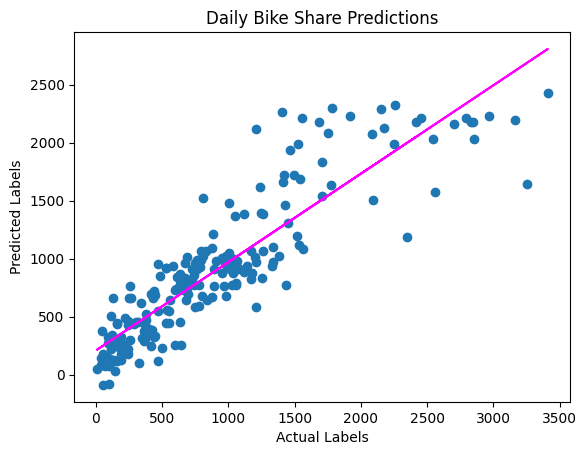

In [2]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Optimizar hiperparámetros
Eche un vistazo a la definición del estimador GradientBoostingRegressor en la salida anterior, y observe que, al igual que los otros estimadores que probamos anteriormente, incluye un gran número de parámetros que controlan la forma en que se entrena el modelo. En el aprendizaje automático, el término parámetros se refiere a los valores que se pueden determinar a partir de los datos; los valores que se especifican para afectar al comportamiento de un algoritmo de entrenamiento se denominan más correctamente hiperparámetros.

Los hiperparámetros específicos para un estimador varían en función del algoritmo que encapsula el estimador. En el caso del estimador GradientBoostingRegressor, el algoritmo es un conjunto que combina múltiples árboles de decisión para crear un modelo predictivo global. Puede obtener más información sobre los hiperparámetros de este estimador en la documentación de Scikit-Learn.

No vamos a entrar en los detalles de cada hiperparámetro aquí, pero trabajan juntos para afectar a la forma en que el algoritmo entrena un modelo. En muchos casos, los valores por defecto proporcionados por Scikit-Learn funcionarán bien; pero puede haber alguna ventaja en modificar los hiperparámetros para obtener un mejor rendimiento predictivo o reducir el tiempo de entrenamiento.

Entonces, ¿cómo saber qué valores de hiperparámetros se deben utilizar? Bueno, a falta de una comprensión profunda de cómo funciona el algoritmo subyacente, tendrá que experimentar. Afortunadamente, SciKit-Learn proporciona una forma de ajustar los hiperparámetros probando múltiples combinaciones y encontrando el mejor resultado para una determinada métrica de rendimiento.

Intentemos utilizar un enfoque de búsqueda en cuadrícula para probar combinaciones a partir de una cuadrícula de valores posibles para los hiperparámetros learning_rate y n_estimators del estimador GradientBoostingRegressor.

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 103970.88979584204
RMSE: 322.44517331763865
R2: 0.7961715961470269


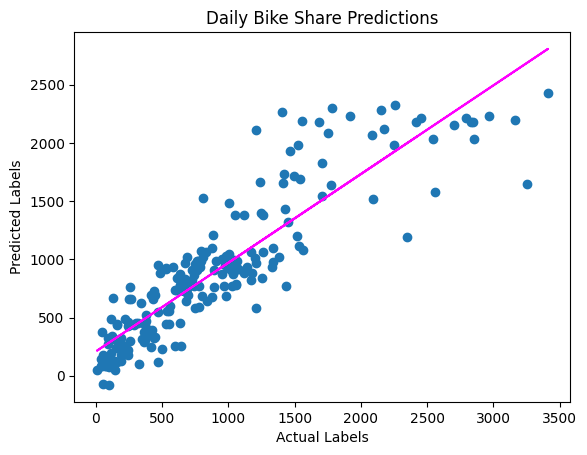

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Preprocesamiento de los datos
Hemos entrenado un modelo con datos cargados directamente desde un archivo fuente, con resultados moderadamente satisfactorios.

En la práctica, es habitual realizar un preprocesamiento de los datos para facilitar al algoritmo el ajuste del modelo. Hay una gran variedad de transformaciones de preprocesamiento que se pueden realizar para preparar los datos para el modelado, pero nos limitaremos a algunas técnicas comunes:

Escalado de características numéricas
Normalizar las características numéricas para que estén en la misma escala evita que las características con valores grandes produzcan coeficientes que afecten desproporcionadamente a las predicciones. Por ejemplo, suponga que sus datos incluyen las siguientes características numéricas:

|A |B |C
|--|--|--
|3 |480 |65
Normalizar estas características a la misma escala puede dar como resultado los siguientes valores (suponiendo que A contiene valores de 0 a 10, B contiene valores de 0 a 1000 y C contiene valores de 0 a 100):

|A |B |C
|--|--|--
|0.3 |0.48 |0.65
Existen múltiples formas de escalar datos numéricos, como calcular los valores mínimo y máximo de cada columna y asignar un valor proporcional entre 0 y 1, o utilizando la media y la desviación estándar de una variable distribuida normalmente para mantener la misma dispersión de valores en una escala diferente.

Codificación de variables categóricas
Los modelos de aprendizaje automático funcionan mejor con características numéricas que con valores de texto, por lo que generalmente es necesario convertir las características categóricas en representaciones numéricas. Por ejemplo, suponga que sus datos incluyen la siguiente característica categórica.

Tamaño
S
M
L
Puede aplicar la codificación ordinal para sustituir un valor entero único para cada categoría, de esta forma

Talla
0
1
2
Otra técnica habitual consiste en utilizar la codificación de un hot para crear características binarias (0 ó 1) individuales para cada posible valor de categoría. Por ejemplo, podría utilizar una codificación en caliente para traducir las posibles categorías en columnas binarias de la siguiente manera:

|Tamaño_S |Tamaño_M |Tamaño_L
|---------|---------|--------
|1 |0 |0
|0 |1 |0
|0 |0 |1
Para aplicar estas transformaciones de preprocesamiento al alquiler de bicicletas, utilizaremos una función de Scikit-Learn llamada pipelines. Estas nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. A continuación, puede ajustar toda la tubería a los datos, de modo que el modelo encapsula todos los pasos de preprocesamiento, así como el algoritmo de regresión. Esto es útil, porque cuando queremos utilizar el modelo para predecir valores a partir de nuevos datos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías utilizadas con los datos de entrenamiento).

Nota: El término pipeline se utiliza mucho en el aprendizaje automático, ¡a menudo para significar cosas muy diferentes! En este contexto, lo usamos para referirnos a los objetos pipeline en Scikit-Learn, pero puede que lo veas usado en otros sitios para significar otra cosa.

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


Bien, el modelo está entrenado, incluidos los pasos de preprocesamiento. Veamos cómo se comporta con los datos de validación.

MSE: 105921.60624069412
RMSE: 325.4559973954914
R2: 0.7923473389909643


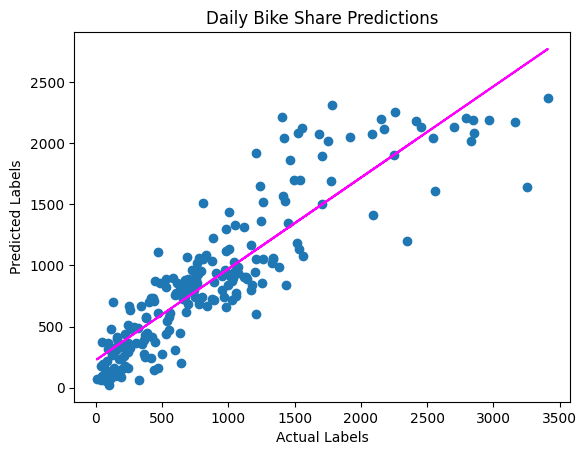

MSE: 105921.60624069412
RMSE: 325.4559973954914
R2: 0.7923473389909643


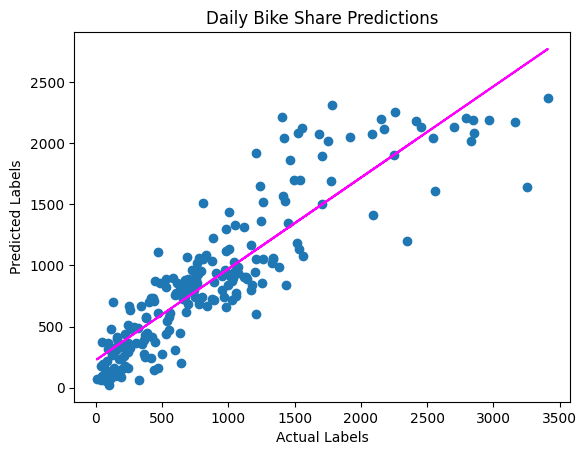

In [5]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

La canalización se compone de las transformaciones y el algoritmo utilizado para entrenar el modelo. Para probar un algoritmo alternativo, simplemente puede cambiar ese paso a un tipo diferente de estimador.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 101495.97150500001
RMSE: 318.58432401014335
R2: 0.8010235181213355


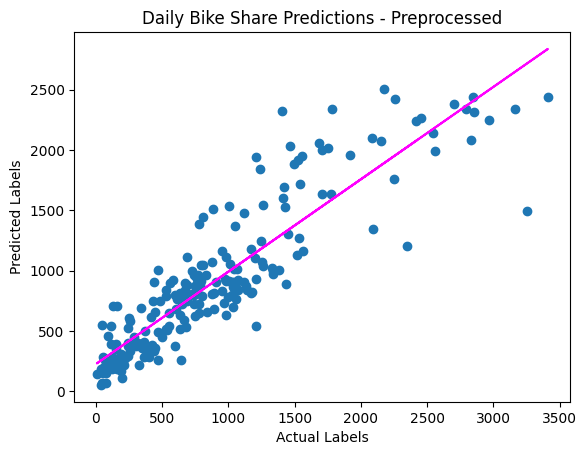

In [6]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ya hemos visto una serie de técnicas comunes utilizadas para entrenar modelos predictivos de regresión. En un proyecto real, es probable que pruebe algunos algoritmos, hiperparámetros y transformaciones de preprocesamiento más, pero a estas alturas ya debería tener una idea general. Exploremos cómo puede utilizar el modelo entrenado con nuevos datos.

## Utilizar el modelo entrenado
En primer lugar, guardemos el modelo.

In [7]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Ahora, podemos cargarlo cuando lo necesitemos y usarlo para predecir etiquetas para nuevos datos. Esto a menudo se llama puntuación o inferencia.

In [8]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 112 rentals


El método predecir del modelo acepta una matriz de observaciones, por lo que puede utilizarlo para generar múltiples predicciones por lotes. Por ejemplo, supongamos que dispone de una previsión meteorológica para los próximos cinco días; podría utilizar el modelo para predecir el alquiler de bicicletas para cada día en función de las condiciones meteorológicas previstas.

In [9]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
581.0
730.0
227.0
189.0
244.0


Resumen Con esto concluyen los cuadernos de este módulo sobre regresión. En este cuaderno ejecutamos una regresión compleja, la ajustamos, guardamos el modelo y lo usamos para predecir resultados para el futuro.